In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import combinations


In [4]:
# from google.colab import files
# uploaded = files.upload()


In [5]:
df = pd.read_csv("Mall_Customers.csv")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
print("Shape:", df.shape)

print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Shape: (200, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Describe:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000

In [7]:
data = df.copy()

if 'CustomerID' in data.columns:
    data.drop(columns=['CustomerID'], inplace=True)

if data['Gender'].dtype == 'object':
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    
print("Final Columns:", data.columns)


Final Columns: Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [8]:
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#all pair
feature_pairs = list(combinations(data.columns, 2))

# store scaled data cluster labels centroids feature names silhouette score
results = []

for f1, f2 in feature_pairs:
    X = data[[f1, f2]].values

    # scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #  kMeans
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    # compute silhouett
    score = silhouette_score(X_scaled, labels)

    results.append((X_scaled, labels, centroids, f1, f2, score))


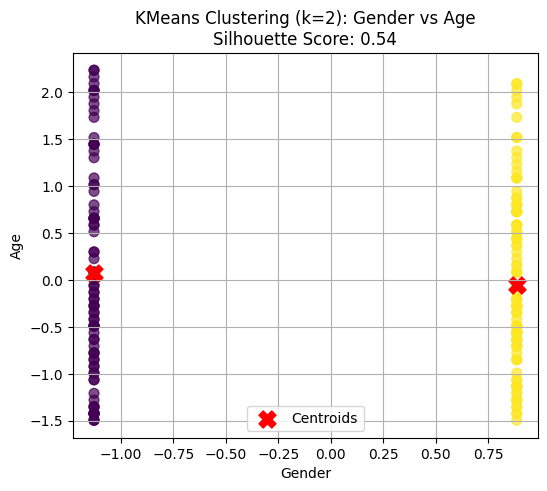

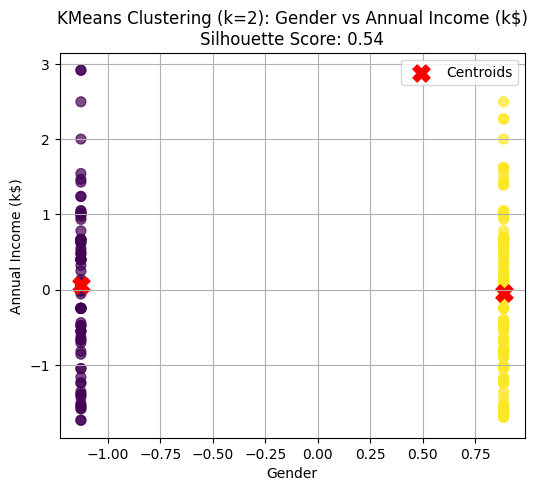

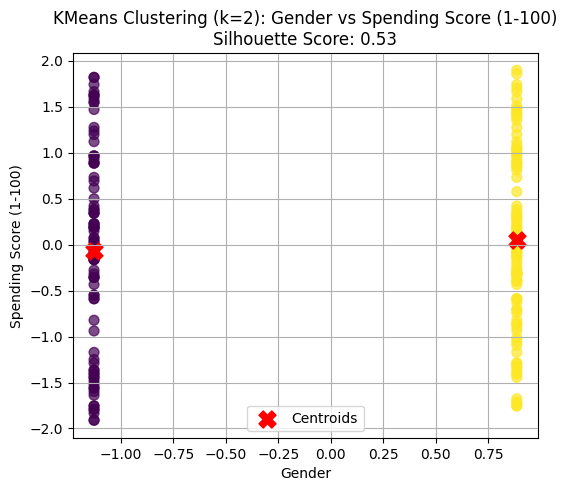

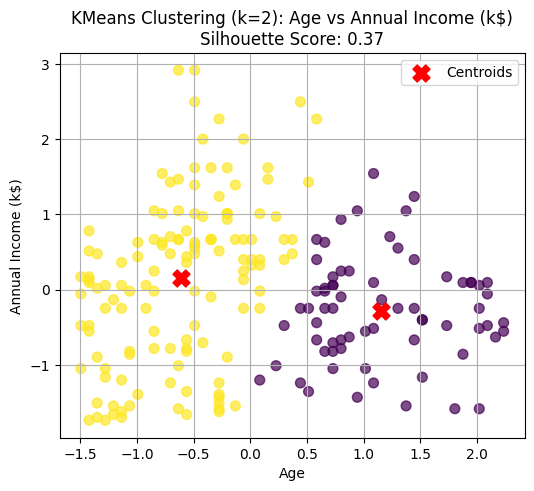

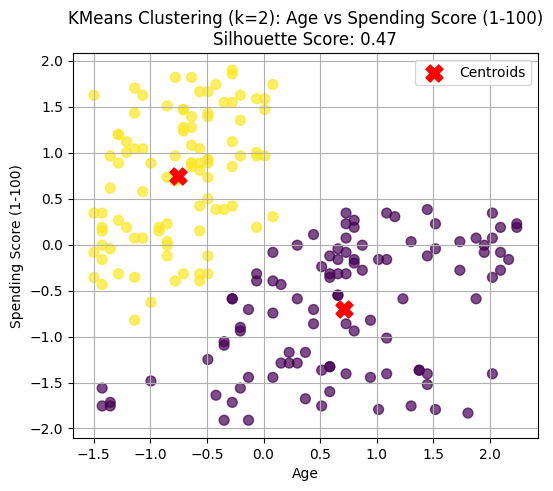

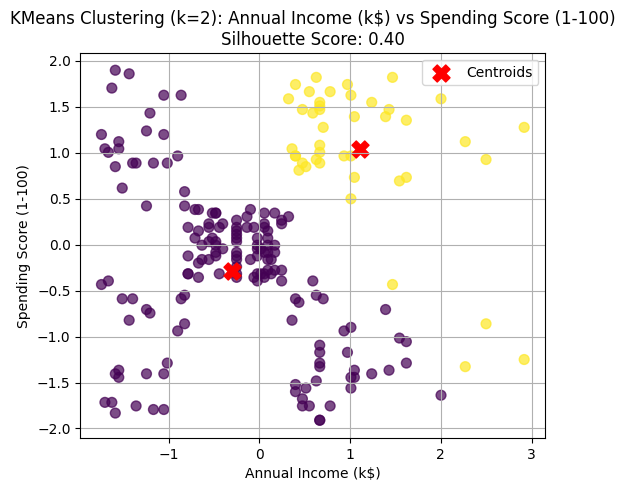

In [9]:
import matplotlib.pyplot as plt

# loop and plot each pair with silhouette score
for X_scaled, labels, centroids, f1, f2, score in results:
    plt.figure(figsize=(6, 5))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, marker='X', label='Centroids')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f"KMeans Clustering (k=2): {f1} vs {f2}\nSilhouette Score: {score:.2f}")
    plt.legend()
    plt.grid(True)
    plt.show()
